<a href="https://colab.research.google.com/github/MeenTers/Project/blob/main/Compare_view_3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Function 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import torch
from torch import nn, load, utils
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets, transforms, models
from torchvision.models.vgg import model_urls
from os import path, listdir
model_urls['vgg19'] = model_urls['vgg19'].replace('https://', 'http://')

In [3]:
from scipy.spatial import distance_matrix
from scipy.spatial import distance
import pandas as pd

In [4]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2

# VGG model

In [5]:
class VGG:
	def __init__(self):
		model = models.vgg19(pretrained=True, progress=True)
		model.classifier = nn.Sequential(*list(model.classifier.children())[:3])
		self.model = model.cuda().eval()

	def __call__(self, x):
		return self.model(x)

In [6]:
vgg = VGG()

Downloading: "http://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

# Create Features Extraction Function

In [7]:
def get_features(model, loader):
    features = []
    with torch.no_grad():
        for batch, _ in tqdm(loader):
            if torch.cuda.is_available():
                batch = batch.cuda()
            b_features = model(batch).detach().cpu().numpy()
            for f in b_features:
                features.append(f)

    return features

# Create Loading the data Function

In [8]:
def get_dataset(images_path):
  transform = transforms.Compose([
    transforms.Resize(size=32),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
  ])

  dataset = datasets.ImageFolder(images_path, transform=transform)
  loader = utils.data.DataLoader(dataset, batch_size=100, shuffle=False, num_workers=1, pin_memory=True)
  return dataset, loader

# Install Font TH-SARABUN

In [9]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

In [10]:
# !pip install -U --pre matplotlib  
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

# Create Compute Distance Function

In [11]:
def get_euclidean(base_car,diff_view):
    A = []
    for i in range(len(diff_view)):
        x = distance.euclidean(base_car[0],diff_view[i])
        A.append(x)
    return(A)

# Data Loader

In [12]:
base_dataset , base_loader = get_dataset(r'/content/drive/MyDrive/3D_Model/Base_car')
view_dataset , view_loader = get_dataset(r'/content/drive/MyDrive/3D_Model/Car_view')

In [13]:
base_car = get_features(vgg,base_loader)
car_view = get_features(vgg,view_loader)

100%|██████████| 1/1 [00:12<00:00, 12.36s/it]


In [15]:
len(car_view)

24

# Create Function Show Image

In [46]:
def show_img(img1,img2,img3,img4,text1,text2,text3,text4,distance):
  # create figure
  fig = plt.figure(figsize=(15, 10))
  # setting values to rows and column variables
  rows = 2
  columns = 2
  # Adds a subplot at the 1st position
  fig.add_subplot(rows, columns, 1)
  # showing image
  plt.imshow(img1)
  plt.axis('off')
  plt.title(text1)

  # Adds a subplot at the 2nd position
  fig.add_subplot(rows, columns, 2)  
  # showing image
  plt.imshow(img2)
  plt.axis('off')
  plt.title(text2)
  plt.text(200,450,'Distance = ',fontsize = 15)
  plt.text(375, 450,round(distance[0],3), fontsize =15,
          bbox = dict(facecolor = 'red', alpha = 0.5))
  # Adds a subplot at the 3rd position
  fig.add_subplot(rows, columns, 3)
  # showing image
  plt.imshow(img3)
  plt.axis('off')
  plt.title(text3)
  plt.text(140,400,'Distance = ',fontsize = 15)
  plt.text(300, 400,round(distance[2],3), fontsize =15,
          bbox = dict(facecolor = 'red', alpha = 0.5))
  # Adds a subplot at the 4th position
  fig.add_subplot(rows, columns, 4)
  # showing image
  plt.imshow(img4)
  plt.axis('off')
  plt.title(text4)
  plt.text(200,400,'Distance = ',fontsize = 15)
  plt.text(360, 400,round(distance[3],3), fontsize =15,
          bbox = dict(facecolor = 'red', alpha = 0.5))

# ID1

In [20]:
img1f  = cv2.imread(r'/content/drive/MyDrive/3D_Model/Base_car/ID1/ID1F.png')
img1_1 = cv2.imread(r'/content/drive/MyDrive/3D_Model/Car_view/ID1/ID1_1.png')
img1_2 = cv2.imread(r'/content/drive/MyDrive/3D_Model/Car_view/ID1/ID1_2.png')
img1_3 = cv2.imread(r'/content/drive/MyDrive/3D_Model/Car_view/ID1/ID1_3.png')
img1_4 = cv2.imread(r'/content/drive/MyDrive/3D_Model/Car_view/ID1/ID1_4.png')

In [21]:
id1b = base_car[0]
id1v = car_view[:4]

In [22]:
id1 = get_euclidean(id1b,id1v)
id1

[122.30803680419922, 81.05716705322266, 141.0064239501953, 114.59463500976562]

In [43]:
tx1 = 'หน้ารถยนต์ปกติ'
tx2 = 'ซูมเข้า 1 ระดับ'
tx3 = 'กระจกข้างหาย'
tx4 = 'เปรียบเทียบกับอีกโมเดล'

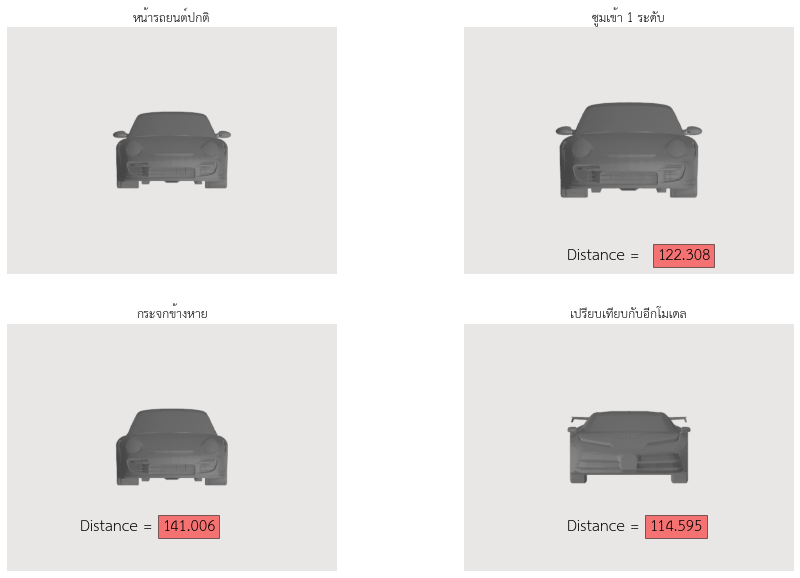

In [80]:
show_img(img1f,img1_1,img1_3,img1_4,tx1,tx2,tx3,tx4,id1)

# ID2

In [65]:
img2f  = cv2.imread(r'/content/drive/MyDrive/3D_Model/Base_car/ID2/ID2F.png')
img2_1 = cv2.imread(r'/content/drive/MyDrive/3D_Model/Car_view/ID2/ID2_1.png')
img2_2 = cv2.imread(r'/content/drive/MyDrive/3D_Model/Car_view/ID2/ID2_2.png')
img2_3 = cv2.imread(r'/content/drive/MyDrive/3D_Model/Car_view/ID2/ID2_3.png')
img2_4 = cv2.imread(r'/content/drive/MyDrive/3D_Model/Car_view/ID2/ID2_4.png')

In [61]:
id2b = base_car[1]
id2v = car_view[4:8]

In [62]:
id2 = get_euclidean(id2b,id2v)
id2

[120.94939422607422, 88.26528930664062, 120.49205780029297, 137.57191467285156]

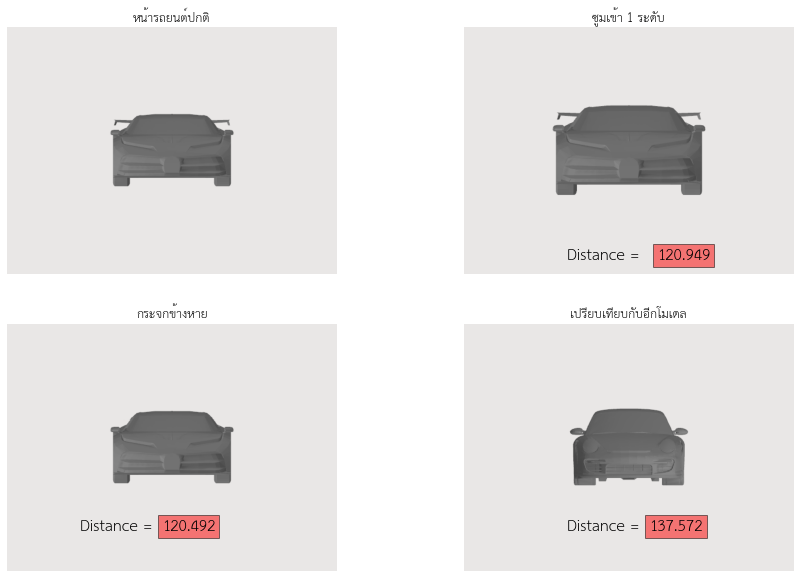

In [66]:
show_img(img2f,img2_1,img2_3,img2_4,tx1,tx2,tx3,tx4,id2)

# ID3

In [73]:
img3f  = cv2.imread(r'/content/drive/MyDrive/3D_Model/Base_car/ID3/ID3F.png')
img3_1 = cv2.imread(r'/content/drive/MyDrive/3D_Model/Car_view/ID3/ID3_1.png')
img3_2 = cv2.imread(r'/content/drive/MyDrive/3D_Model/Car_view/ID3/ID3_2.png')
img3_3 = cv2.imread(r'/content/drive/MyDrive/3D_Model/Car_view/ID3/ID3_3.png')
img3_4 = cv2.imread(r'/content/drive/MyDrive/3D_Model/Car_view/ID3/ID3_4.png')

In [74]:
id3b = base_car[2]
id3v = car_view[8:12]

In [75]:
id3 = get_euclidean(id3b,id3v)
id3

[198.7489471435547, 204.42152404785156, 203.05252075195312, 200.43109130859375]

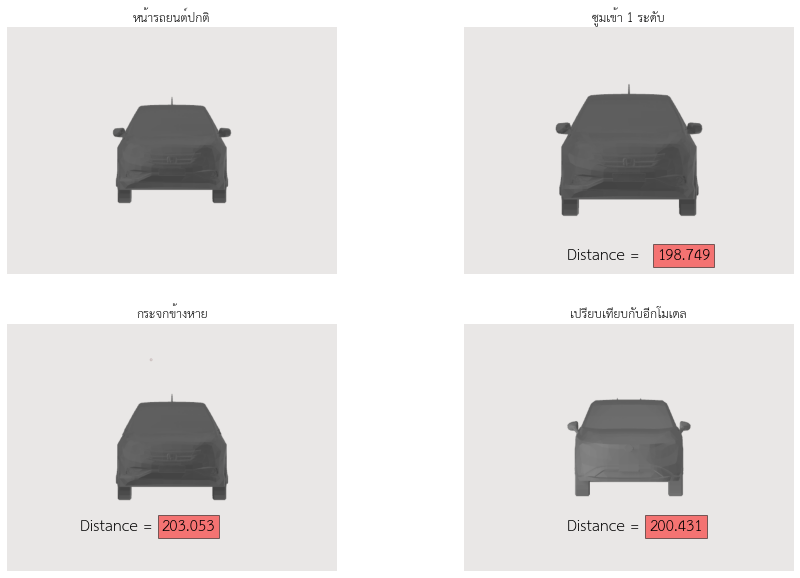

In [76]:
show_img(img3f,img3_1,img3_3,img3_4,tx1,tx2,tx3,tx4,id3)

# ID4

In [81]:
img4f  = cv2.imread(r'/content/drive/MyDrive/3D_Model/Base_car/ID4/ID4F.png')
img4_1 = cv2.imread(r'/content/drive/MyDrive/3D_Model/Car_view/ID4/ID4_1.png')
img4_2 = cv2.imread(r'/content/drive/MyDrive/3D_Model/Car_view/ID4/ID4_2.png')
img4_3 = cv2.imread(r'/content/drive/MyDrive/3D_Model/Car_view/ID4/ID4_3.png')
img4_4 = cv2.imread(r'/content/drive/MyDrive/3D_Model/Car_view/ID4/ID4_4.png')

In [82]:
id4b = base_car[3]
id4v = car_view[12:16]

In [83]:
id4 = get_euclidean(id4b,id4v)
id4

[124.24259185791016, 128.35922241210938, 134.72019958496094, 146.0117950439453]

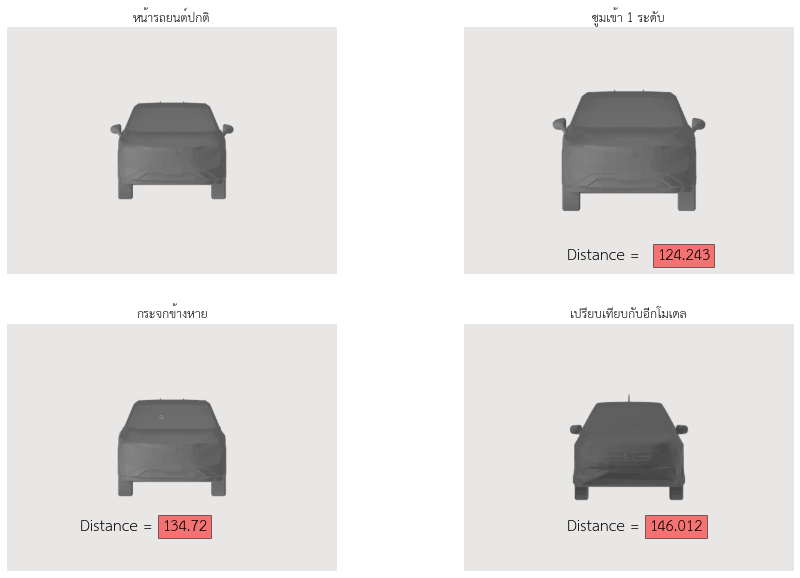

In [84]:
show_img(img4f,img4_1,img4_3,img4_4,tx1,tx2,tx3,tx4,id4)

# ID5

In [85]:
img5f  = cv2.imread(r'/content/drive/MyDrive/3D_Model/Base_car/ID5/ID5F.png')
img5_1 = cv2.imread(r'/content/drive/MyDrive/3D_Model/Car_view/ID5/ID5_1.png')
img5_2 = cv2.imread(r'/content/drive/MyDrive/3D_Model/Car_view/ID5/ID5_2.png')
img5_3 = cv2.imread(r'/content/drive/MyDrive/3D_Model/Car_view/ID5/ID5_3.png')
img5_4 = cv2.imread(r'/content/drive/MyDrive/3D_Model/Car_view/ID5/ID5_4.png')

In [87]:
id5b = base_car[4]
id5v = car_view[16:20]

In [88]:
id5 = get_euclidean(id5b,id5v)
id5

[134.92286682128906, 127.69986724853516, 95.9585189819336, 102.9007339477539]

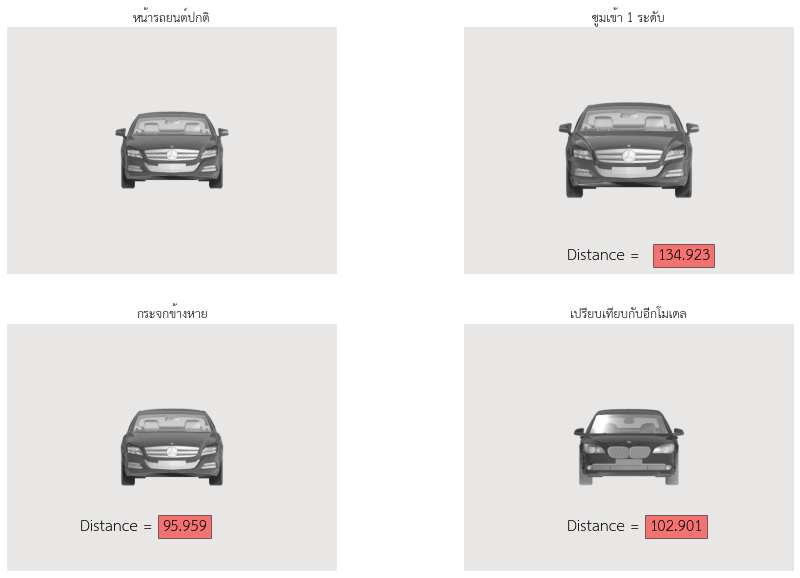

In [89]:
show_img(img5f,img5_1,img5_3,img5_4,tx1,tx2,tx3,tx4,id5)

# ID6

In [90]:
img6f  = cv2.imread(r'/content/drive/MyDrive/3D_Model/Base_car/ID6/ID6F.png')
img6_1 = cv2.imread(r'/content/drive/MyDrive/3D_Model/Car_view/ID6/ID6_1.png')
img6_2 = cv2.imread(r'/content/drive/MyDrive/3D_Model/Car_view/ID6/ID6_2.png')
img6_3 = cv2.imread(r'/content/drive/MyDrive/3D_Model/Car_view/ID6/ID6_3.png')
img6_4 = cv2.imread(r'/content/drive/MyDrive/3D_Model/Car_view/ID6/ID6_4.png')

In [91]:
id6b = base_car[5]
id6v = car_view[20:24]

In [92]:
id6 = get_euclidean(id6b,id6v)
id6

[111.06360626220703, 96.8582534790039, 92.35125732421875, 80.20320129394531]

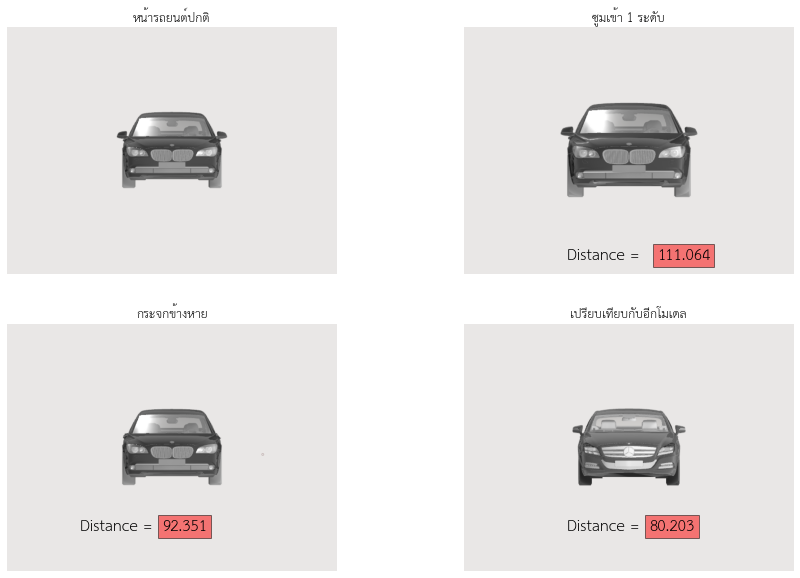

In [93]:
show_img(img6f,img6_1,img6_3,img6_4,tx1,tx2,tx3,tx4,id6)